In [1]:
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score
# Legg til src-mappen i sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src')))

from data_rens import DataRens
from statistiske_maal import Statistiske_maal
from data_manipulering import DataManipulering


# Skydekke 

* Oppretter et objekt av klassen DataRens og DataManipulering
* Bruker metodene for å opprette en database og konverterer dette til en dataframe 
* "Forfalsker" datafeil

In [2]:
#Oppretter filstien til JSONfilen
skydekke_fil = "../data/frost_skydekke.json"

#Oppretter et skydekke-objekt i DataRens() og manipulering av data
rens_skydekke = DataRens()
manip_skydekke = DataManipulering()

#Oppretter en database med dataen og lager en dataframe 
database = rens_skydekke.database_opprettelse(skydekke_fil)
df_skydekke = rens_skydekke.fra_database_til_dataframe()


#Manipulerer dataen:
#df_fjern_verdi = manip_skydekke.fjern_verdi_for_tilfeldig_aar(df_skydekke)
#df_legg_til_duplikater = manip_skydekke.legg_til_duplikater_for_tilfeldig_aar(df_fjern_verdi)


#Viser den manipulerte dataframen:
#display(df_legg_til_duplikater.head())



Suksess! JSON er nå omgjort til en database



* Bruker metoder fra Datarens for å rense dataen

In [3]:
# Bruke metode for å rense Dataframen
df_skydekke_renset = rens_skydekke.rens_DataFrame(df_skydekke)

# Printer ut renset dataframe av skydekke
display("Ferdig renset dataframe: ", df_skydekke_renset)


Antall duplikater funnet: 0
Det er ingen datoer som mangler verdier!


'Ferdig renset dataframe: '

,year,value,unit
0,1980,5.0,octas
1,1981,5.2,octas
2,1982,5.3,octas
3,1983,5.1,octas
4,1984,5.5,octas
5,1985,5.2,octas
6,1986,5.2,octas
7,1987,5.3,octas
8,1988,5.5,octas
9,1989,5.1,octas


*Beregninger*: <br>
Beregningene gjøres i 4 intervaller: <br>
1980-1989 <br>
1990-1999 <br>
2000-2009 <br>
2010-2020 <br>

Samt en beregning for hele intervallet i sin helhet (1980-2020)

**Beregning av gjennomsnitt**


In [4]:
skydekke_mål = Statistiske_maal()

gjennomsnitt_skydekke = skydekke_mål.gjennomsnitt(df_skydekke_renset)

print("Gjennomsnitt i 4 intervaller + totalt: ")
for key, value in gjennomsnitt_skydekke.items():
    print(f"{key}: {value} octas")


Gjennomsnitt i 4 intervaller + totalt: 
1980-1989: 5.24 octas
1990-1999: 5.41 octas
2000-2009: 5.58 octas
2010-2020: 5.59 octas
Totalt: 5.46 octas


**Beregning av median**

In [5]:
median_skydekke = skydekke_mål.median(df_skydekke_renset)

print("Median i 4 intervaller + totalt: ")
for key, value in median_skydekke.items():
    print(f"{key}: {value} octas")

Median i 4 intervaller + totalt: 
1980-1989: 5.2 octas
1990-1999: 5.3 octas
2000-2009: 5.6 octas
2010-2020: 5.6 octas
Totalt: 5.5 octas


**Beregning av standardavvik**

In [6]:
standardavvik_skydekke = skydekke_mål.standardavvik(df_skydekke_renset)

print("Standardavvik i 4 intervaller + totalt: ")
for key, value in standardavvik_skydekke.items():
    print(f"{key}: {value} octas")

Standardavvik i 4 intervaller + totalt: 
1980-1989: 0.16 octas
1990-1999: 0.26 octas
2000-2009: 0.11 octas
2010-2020: 0.21 octas
Totalt: 0.24 octas


# Visualiseringer

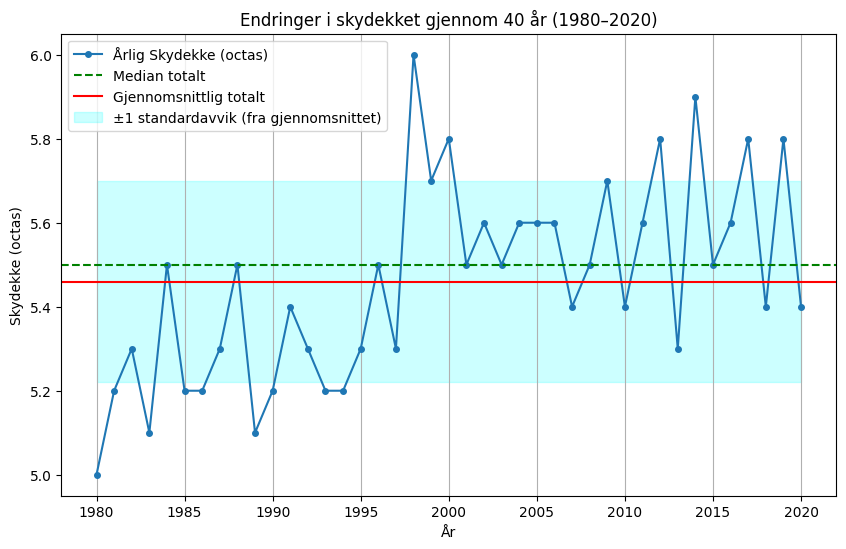

In [7]:
#Definerer dataen
år = df_skydekke_renset["year"]
verdier = df_skydekke_renset["value"]
gjennomsnitt = gjennomsnitt_skydekke["Totalt"]
median = median_skydekke["Totalt"]
standardavvik = standardavvik_skydekke["Totalt"]

# Definerer x og y aksen
x_aksen = år 
y_aksen = verdier

plt.figure(figsize=(10, 6))   # Bestemmer størrelsen på vinduet til visualiseringen

#plotter dataen som skal stå i visualiseringen
plt.plot(x_aksen, y_aksen, marker='o', ms = 4, label='Årlig Skydekke (octas)')
plt.xlabel('År')
plt.ylabel('Skydekke (octas)')
plt.title('Endringer i skydekket gjennom 40 år (1980–2020)')

#Legger inn de statistiske målene
plt.axhline(y= median, color="green", linestyle='--', label="Median totalt")
plt.axhline(y=gjennomsnitt, color="red", label="Gjennomsnittlig totalt")
plt.fill_between(år, gjennomsnitt - standardavvik, gjennomsnitt + standardavvik,
                 color='cyan', alpha=0.2, label='±1 standardavvik (fra gjennomsnittet)')



plt.grid(axis= 'x')   # Rutenett
plt.legend()     # Tekstboks med forklaringer
plt.show()


**Visualisering med seaborn**

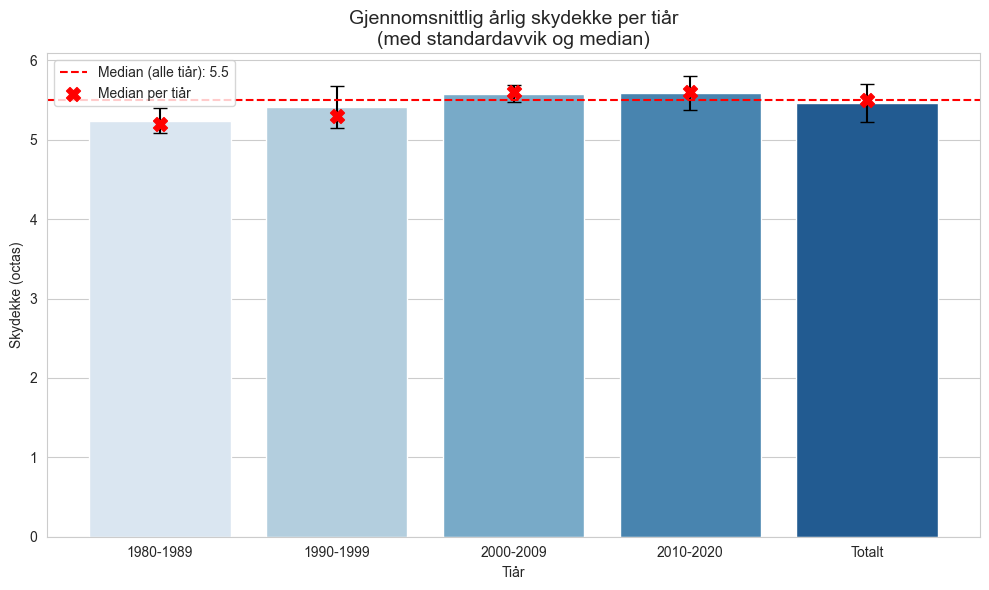

In [8]:
#Definerer dataen
intervall = gjennomsnitt_skydekke.keys()
gjennomsnitt = gjennomsnitt_skydekke.values()
median = median_skydekke.values()
stdavvik = standardavvik_skydekke.values()

# Lager en DataFrame
df_statistikk = pd.DataFrame({
    'Tiår': intervall,
    'Gjennomsnitt': gjennomsnitt,
    'Median': median,
    'Standardavvik': stdavvik
})
# Sett stil
sns.set_style("whitegrid")
 
# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_statistikk, x='Tiår', y='Gjennomsnitt', hue='Tiår', palette='Blues')
 
# Legg til feilstolper manuelt med plt.errorbar()
for i, row in df_statistikk.iterrows():
    ax.errorbar(x=i, y=row['Gjennomsnitt'], yerr=row['Standardavvik'], fmt='none', c='black', capsize=5)
 
# Legg til horisontal linje for medianen av hele perioden
median_all_years = df_statistikk['Median'].median()  # Beregn medianen for hele datasettet
plt.axhline(median_all_years, color='red', linestyle='--', label=f"Median (alle tiår): {median_all_years}")
 
# Legg til medianen for hvert tiår som kryss
ax.scatter(df_statistikk.index, df_statistikk['Median'], color='red', zorder=5, label="Median per tiår", s=100, marker='X')

# Legger til etiketter og tittel
plt.xlabel('Tiår')
plt.ylabel('Skydekke (octas)')
plt.title("Gjennomsnittlig årlig skydekke per tiår\n(med standardavvik og median)", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

**Lagrer variablene med %store**

In [9]:
#lagrer variablene for en samlet visualisering
%store gjennomsnitt_skydekke
%store median_skydekke
%store standardavvik_skydekke
%store df_skydekke_renset

Stored 'gjennomsnitt_skydekke' (dict)
Stored 'median_skydekke' (dict)
Stored 'standardavvik_skydekke' (dict)
Stored 'df_skydekke_renset' (DataFrame)


## Prediktiv analyse

In [10]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src')))

from prediktiv_analyse import TrendModel

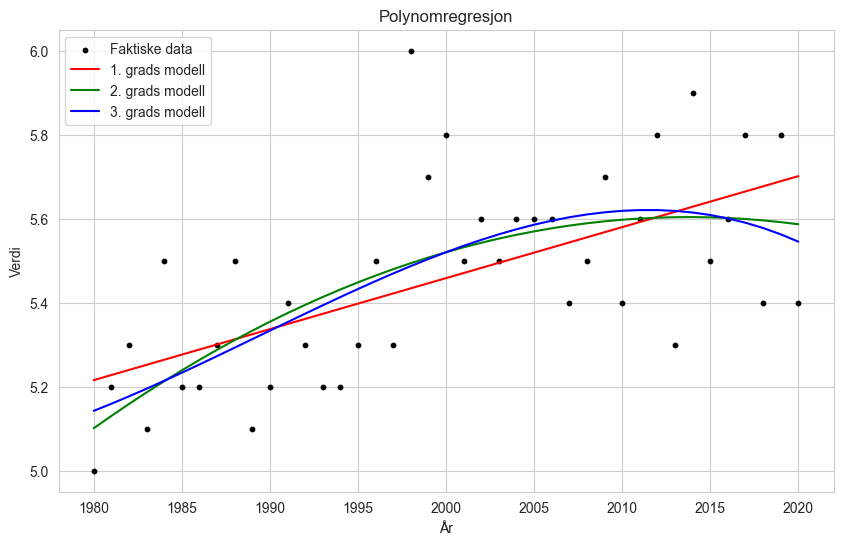

R²-scorer for modellene:
  1. grads modell: 0.3779
  2. grads modell: 0.4335
  3. grads modell: 0.4395


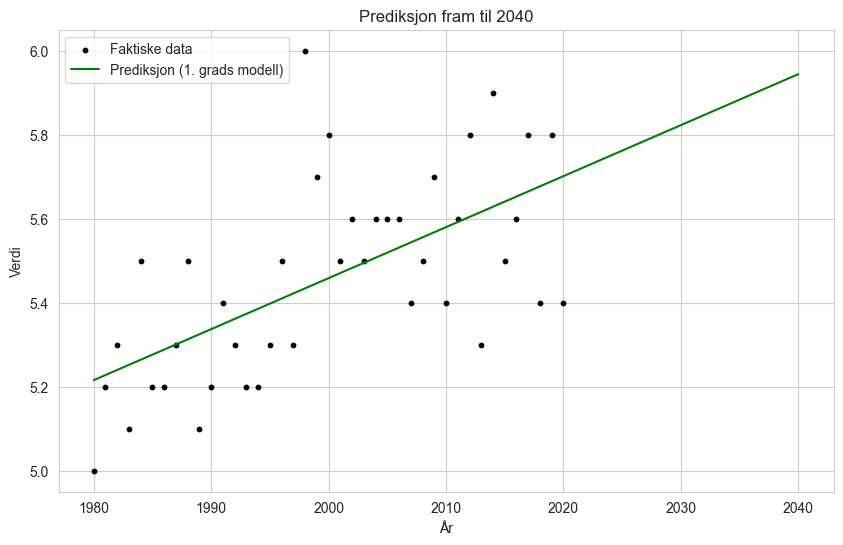

In [11]:
temp_model = TrendModel(df_skydekke_renset)
temp_model.fit_models()
temp_model.plot_models()
temp_model.print_r2_scores()
temp_model.plot_prediction(2040, deg=1)
